In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv("client_data (1).csv")

In [ ]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
df.shape

(14606, 26)

In [ ]:
df.tail()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,5/24/2012,5/8/2016,5/8/2015,5/26/2014,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,8/27/2012,8/27/2016,8/27/2012,8/28/2015,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2/8/2012,2/7/2016,2/8/2012,2/9/2015,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,8/30/2012,8/30/2016,8/30/2012,8/31/2015,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [ ]:
#df.columns.value_counts()

In [ ]:
df1 = pd.read_csv("price_data (1).csv")
df1

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [ ]:
df1.shape

(193002, 8)

In [ ]:
final_df = df.join(df1.set_index('id'), on= "id", how='left')
final_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [ ]:
#df['id'].duplicated()

In [ ]:
final_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

In [ ]:
#df['channel_sales'].value_counts()

In [ ]:
#df['origin_up'].value_counts()

In [ ]:
final_df.dropna(how = "all",inplace = True)

In [ ]:
final_df.shape

(175149, 33)

In [ ]:
final_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [ ]:
final_df.dropna()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


<Axes: >

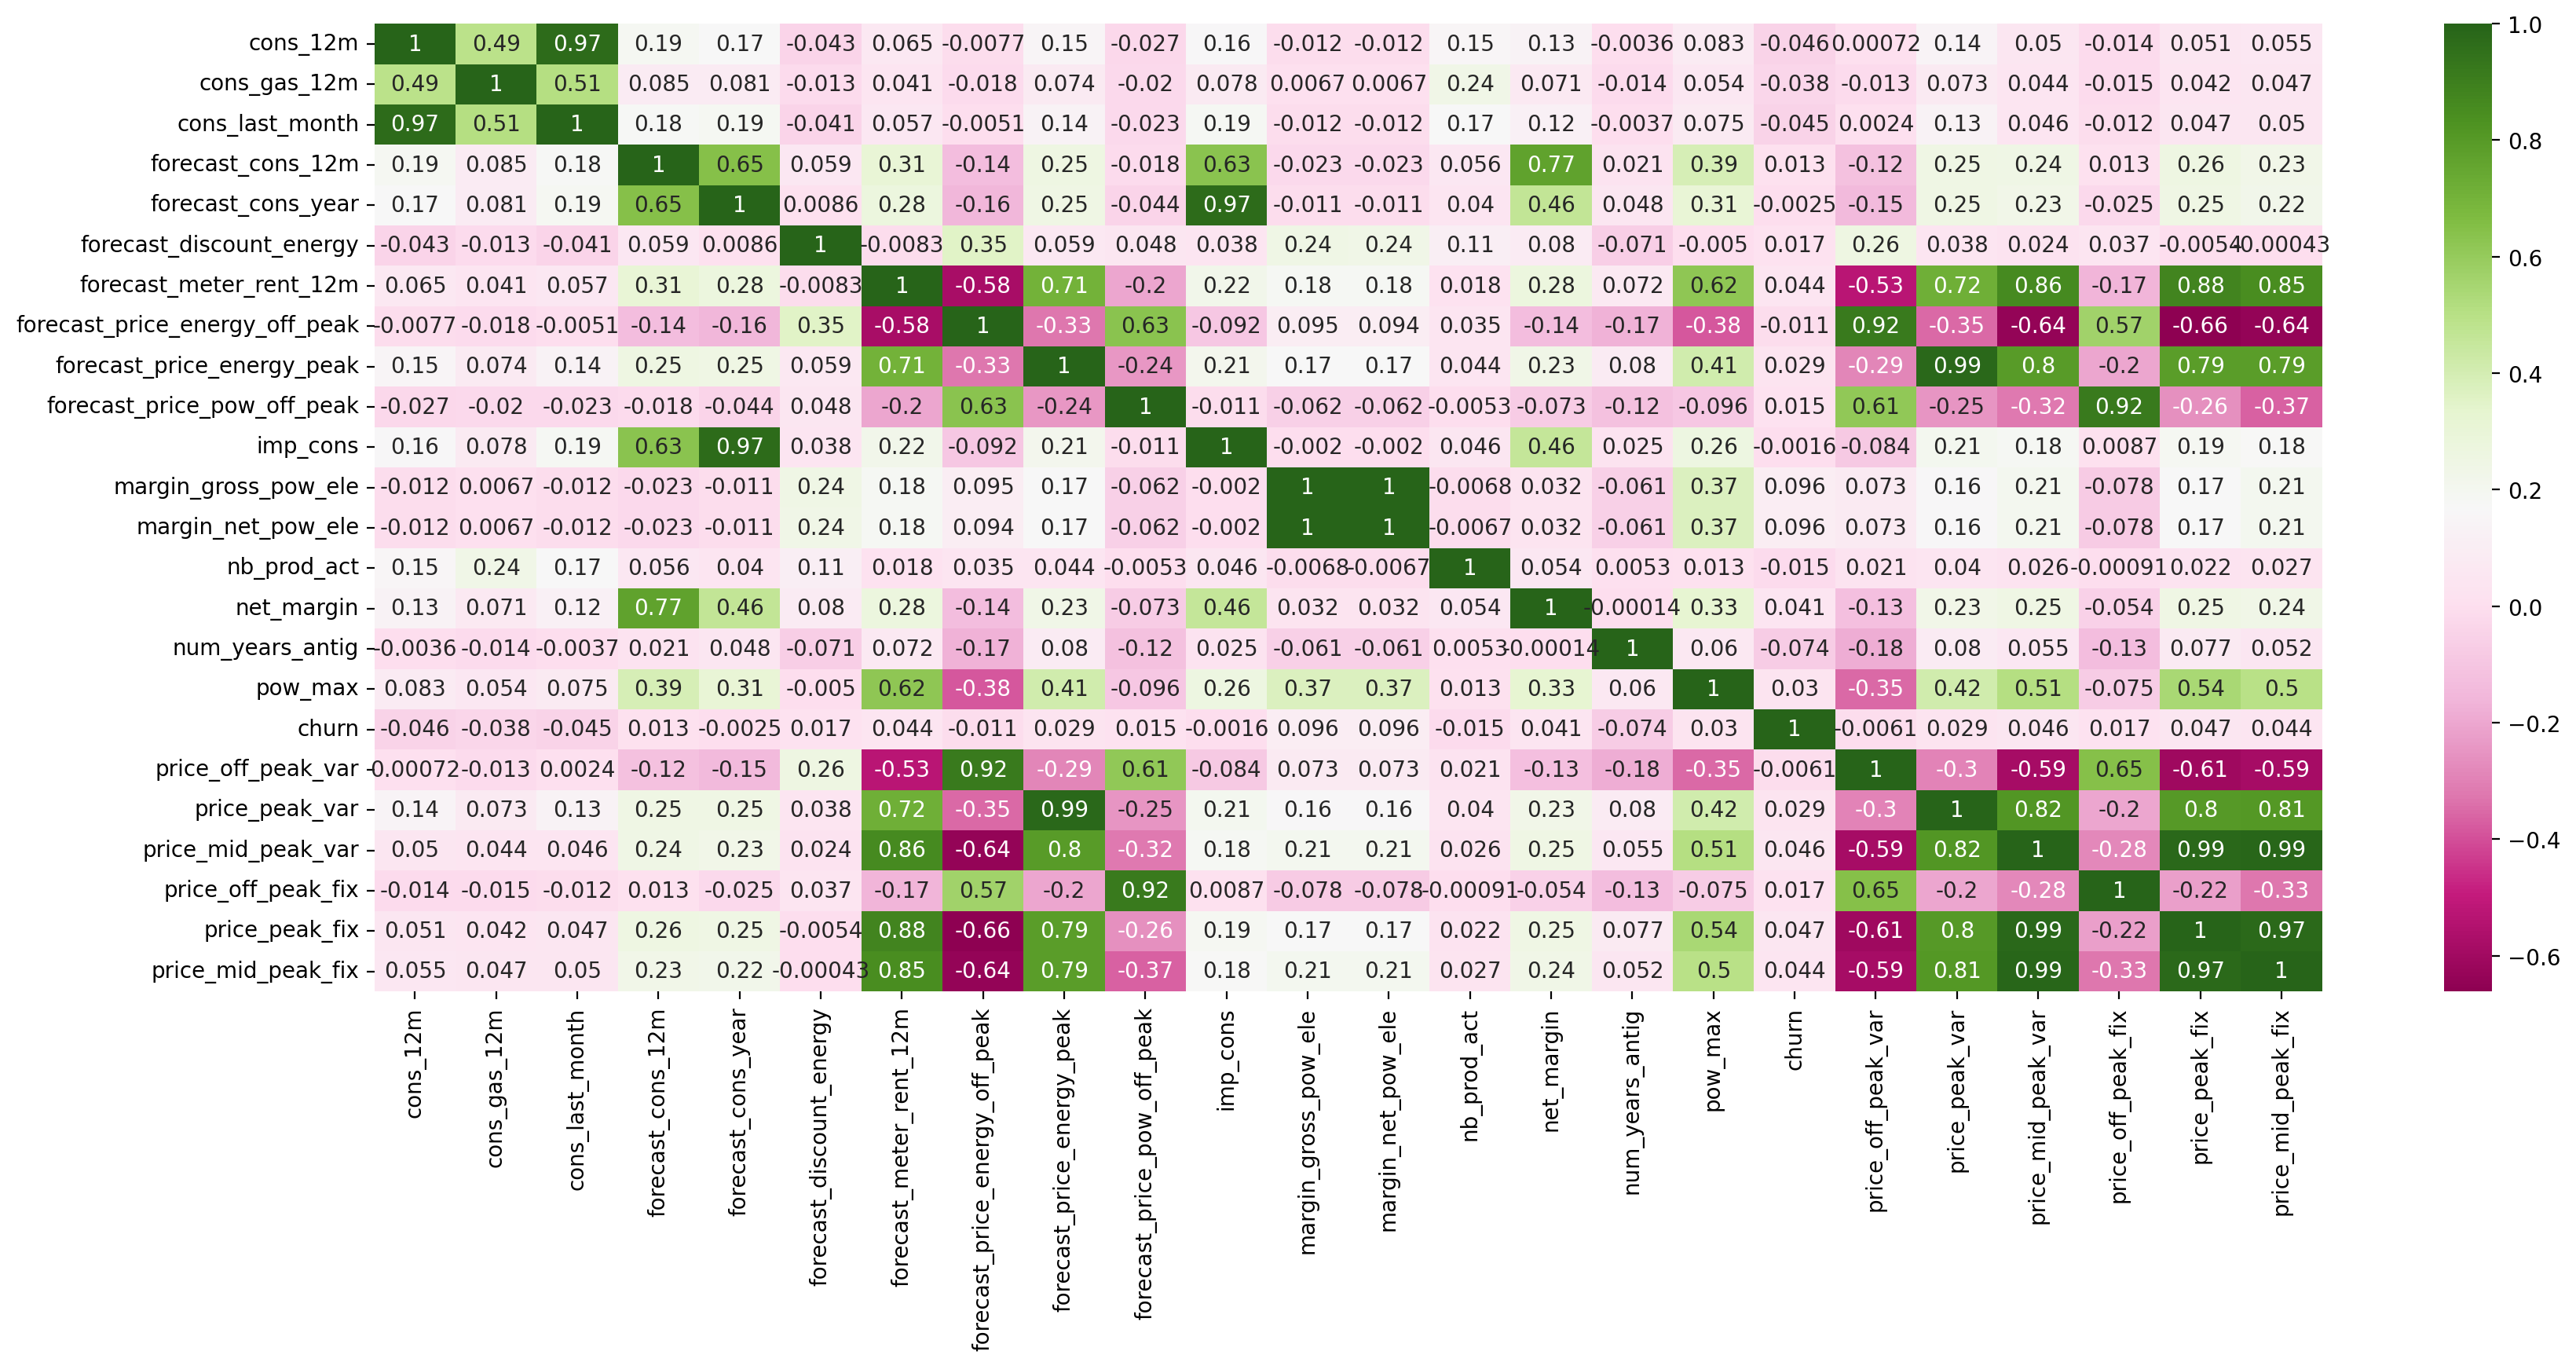

In [ ]:
plt.figure(figsize =(20,8), dpi=200)
sns.heatmap(final_df.corr(),cmap ="PiYG", annot = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#variables for which VIF to be calculated
X = final_df[['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']]

#converting into dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#VIF Calculation
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                           feature           VIF
0                         cons_12m     18.115656
1                     cons_gas_12m      1.437089
2                  cons_last_month     18.287113
3                forecast_cons_12m      5.908453
4               forecast_cons_year     22.875583
5         forecast_discount_energy      2.286016
6          forecast_meter_rent_12m      9.881053
7   forecast_price_energy_off_peak    611.314190
8       forecast_price_energy_peak     78.932386
9      forecast_price_pow_off_peak   1158.110318
10                        imp_cons     22.011178
11            margin_gross_pow_ele  14464.813309
12              margin_net_pow_ele  14456.276026
13                     nb_prod_act      4.615266
14                      net_margin      3.472239
15                 num_years_antig      9.751127
16                         pow_max      6.474925
17                           churn      1.133592
18              price_off_peak_var    484.579001
19                  

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 14605
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  int64  
 12  forecast_meter_re

In [ ]:
final_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [ ]:
final_df1= final_df[['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
      'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
   'price_off_peak_fix', 'price_peak_fix']]

In [ ]:
final_df1

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,...,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,40.565969,24.339581
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,40.565969,24.339581
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,40.565973,24.339578
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,40.565973,24.339578
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,40.565973,24.339578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,44.266930,0.000000


In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 14605
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        175149 non-null  object 
 1   channel_sales             175149 non-null  object 
 2   cons_12m                  175149 non-null  int64  
 3   cons_gas_12m              175149 non-null  int64  
 4   cons_last_month           175149 non-null  int64  
 5   date_activ                175149 non-null  object 
 6   date_end                  175149 non-null  object 
 7   date_modif_prod           175149 non-null  object 
 8   date_renewal              175149 non-null  object 
 9   forecast_cons_year        175149 non-null  int64  
 10  forecast_discount_energy  175149 non-null  int64  
 11  forecast_meter_rent_12m   175149 non-null  float64
 12  has_gas                   175149 non-null  object 
 13  imp_cons                  175149 non-null  fl

In [ ]:
cat_cols = ['channel_sales','date_activ','date_end','date_modif_prod','date_renewal','has_gas','origin_up','price_date']

In [ ]:
#final_df1['date_activ'] = final_df1.date_activ.astype(str)
#final_df1['date_activ']

In [ ]:
from scipy.stats import chi2_contingency

def get_chi_sq(row, column, df):

    #plotting the graph for each independent variable with target variable
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.countplot(data=final_df1, x=row, hue=column)
    plt.xlabel(row)
    plt.ylabel('Count')
    plt.show()
    #doing this to keep from opening too many figs at once
    plt.close(fig);

    #creating cross tab to calculate chi square values
    xtab = pd.crosstab(final_df1[row], final_df1[column], margins = False)
    print('observed data:\n', xtab)

    #Chi-square contingency table
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))

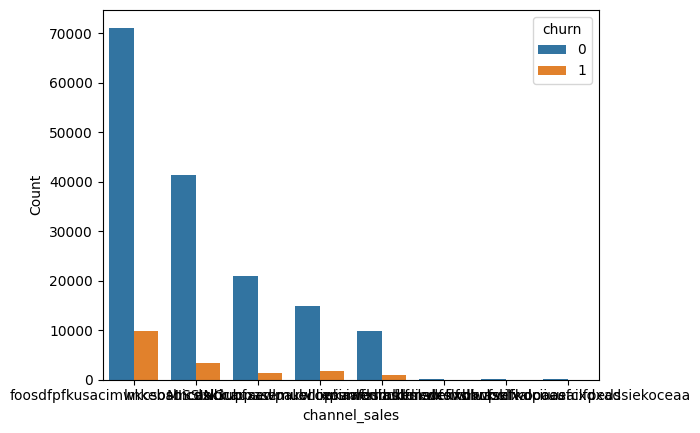

observed data:
 churn                                 0     1
channel_sales                                
MISSING                           41290  3394
epumfxlbckeskwekxbiuasklxalciiuu     36     0
ewpakwlliwisiwduibdlfmalxowmwpci   9813   899
fixdbufsefwooaasfcxdxadsiekoceaa     24     0
foosdfpfkusacimwkcsosbicdxkicaua  71149  9822
lmkebamcaaclubfxadlmueccxoimlema  20871  1234
sddiedcslfslkckwlfkdpoeeailfpeds    131     0
usilxuppasemubllopkaafesmlibmsdf  14832  1654
expected data:
 [[4.03461959e+04 4.33780411e+03]
 [3.25052156e+01 3.49478444e+00]
 [9.67210747e+03 1.03989253e+03]
 [2.16701437e+01 2.32985629e+00]
 [7.31105503e+04 7.86044975e+03]
 [1.99591053e+04 2.14589472e+03]
 [1.18282868e+02 1.27171323e+01]
 [1.48855829e+04 1.60041712e+03]]
chi-squared value: 1242.3893 for 7 dof; p-value = 0.0000



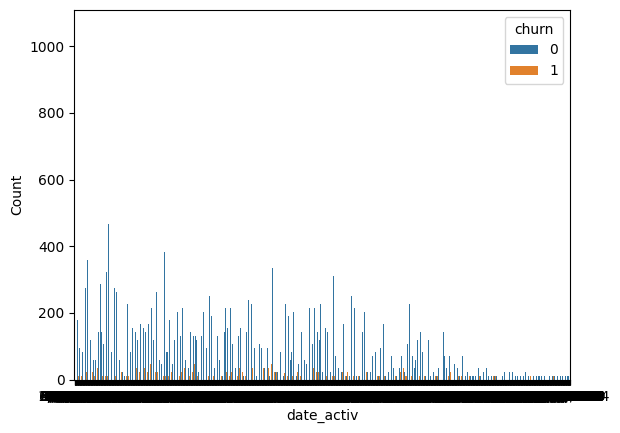

observed data:
 churn         0   1
date_activ         
1/1/2004     12   0
1/1/2005     12   0
1/1/2006     12   0
1/1/2007     24   0
1/1/2008     12   0
...         ...  ..
9/8/2012    108  12
9/9/2005     24   0
9/9/2009    276   0
9/9/2010     48  12
9/9/2011    108   0

[1796 rows x 2 columns]
expected data:
 [[ 10.83507185   1.16492815]
 [ 10.83507185   1.16492815]
 [ 10.83507185   1.16492815]
 ...
 [249.20665262  26.79334738]
 [ 54.17535927   5.82464073]
 [ 97.51564668  10.48435332]]
chi-squared value: 25130.8848 for 1795 dof; p-value = 0.0000



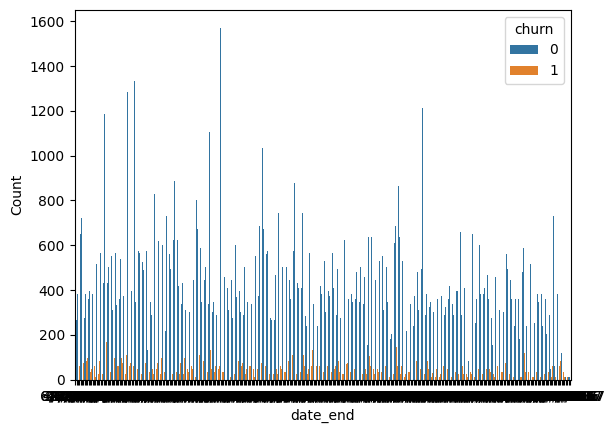

observed data:
 churn        0    1
date_end           
1/1/2017   732   12
1/10/2017  336  132
1/11/2017  252   36
1/12/2017  156   36
1/13/2017  444   24
...        ...  ...
9/5/2016   300   36
9/6/2016   276   24
9/7/2016   444   24
9/8/2016   444   60
9/9/2016   408   24

[368 rows x 2 columns]
expected data:
 [[6.71774455e+02 7.22255451e+01]
 [4.22567802e+02 4.54321977e+01]
 [2.60041724e+02 2.79582755e+01]
 [1.73361150e+02 1.86388504e+01]
 [4.22567802e+02 4.54321977e+01]
 [3.14217084e+02 3.37829163e+01]
 [2.79906023e+02 3.00939771e+01]
 [1.50788083e+02 1.62119167e+01]
 [4.74937316e+02 5.10626838e+01]
 [6.39269239e+02 6.87307607e+01]
 [2.69973874e+02 2.90261263e+01]
 [3.56654448e+02 3.83455515e+01]
 [4.65908090e+02 5.00919103e+01]
 [4.97510383e+02 5.34896174e+01]
 [3.57557371e+02 3.84426288e+01]
 [3.90062587e+02 4.19374133e+01]
 [3.14217084e+02 3.37829163e+01]
 [5.41753593e+02 5.82464073e+01]
 [4.00897659e+02 4.31023414e+01]
 [4.22567802e+02 4.54321977e+01]
 [3.02479089e+02 3.25209

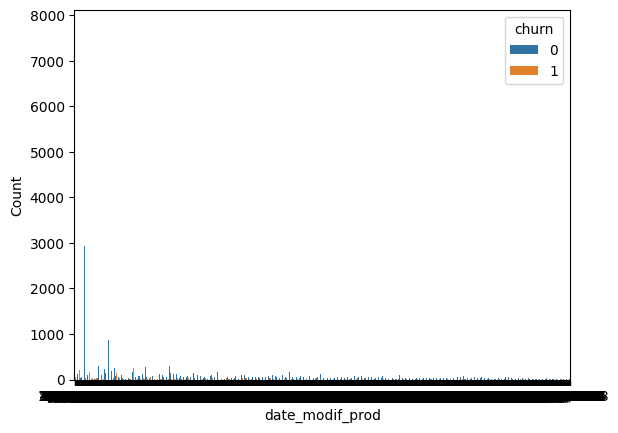

observed data:
 churn              0   1
date_modif_prod         
1/1/2006          12   0
1/1/2007          24   0
1/1/2008          12   0
1/1/2010         264   0
1/1/2012         132   0
...              ...  ..
9/9/2010          12  12
9/9/2011          48   0
9/9/2013          12   0
9/9/2014          12  12
9/9/2015          24  12

[2129 rows x 2 columns]
expected data:
 [[10.83507185  1.16492815]
 [21.67014371  2.32985629]
 [10.83507185  1.16492815]
 ...
 [10.83507185  1.16492815]
 [21.67014371  2.32985629]
 [32.50521556  3.49478444]]
chi-squared value: 29299.3296 for 2128 dof; p-value = 0.0000



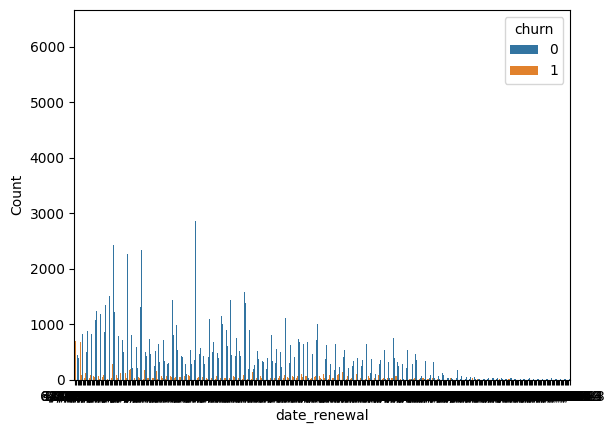

observed data:
 churn            0    1
date_renewal           
1/1/2016      1174   60
1/10/2016      588  144
1/11/2015       12   12
1/11/2016      336  132
1/12/2014       12    0
...            ...  ...
9/7/2015       300   24
9/8/2013        12    0
9/8/2014        24   12
9/8/2015       408   12
9/9/2015       432   48

[386 rows x 2 columns]
expected data:
 [[1.11420656e+03 1.19793444e+02]
 [6.60939383e+02 7.10606170e+01]
 [2.16701437e+01 2.32985629e+00]
 [4.22567802e+02 4.54321977e+01]
 [1.08350719e+01 1.16492815e+00]
 [2.16701437e+01 2.32985629e+00]
 [6.50104311e+01 6.98956888e+00]
 [1.08350719e+01 1.16492815e+00]
 [5.41753593e+01 5.82464073e+00]
 [1.08350719e+01 1.16492815e+00]
 [5.63423736e+02 6.05762636e+01]
 [1.08350719e+01 1.16492815e+00]
 [9.93214920e+00 1.06785080e+00]
 [1.08350719e+01 1.16492815e+00]
 [8.00892394e+02 8.61076055e+01]
 [4.33402874e+01 4.65971259e+00]
 [4.64102244e+02 4.98977556e+01]
 [6.50104311e+01 6.98956888e+00]
 [5.95928952e+02 6.40710481e+01]
 [6.7

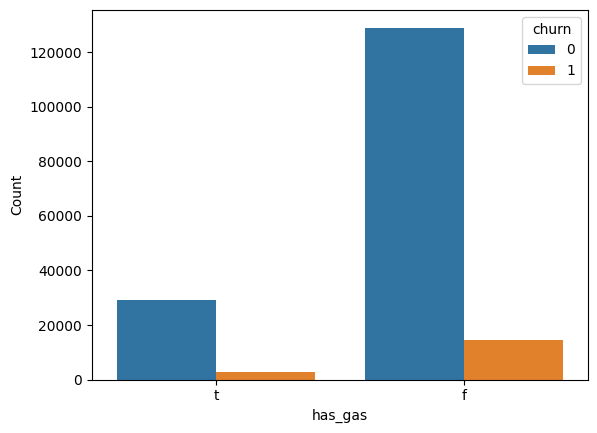

observed data:
 churn         0      1
has_gas               
f        128965  14399
t         29181   2604
expected data:
 [[129446.60342908  13917.39657092]
 [ 28699.39657092   3085.60342908]]
chi-squared value: 101.7082 for 1 dof; p-value = 0.0000



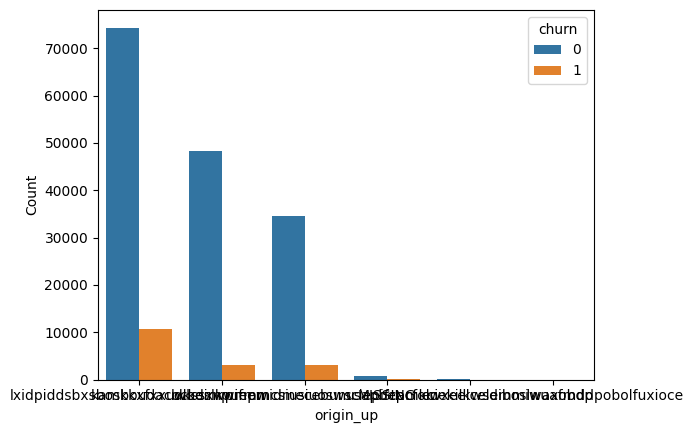

observed data:
 churn                                 0      1
origin_up                                     
MISSING                             719     48
ewxeelcelemmiwuafmddpobolfuxioce     12      0
kamkkxfxxuwbdslkwifmmcsiusiuosws  48410   3093
ldkssxwpmemidmecebumciepifcamkci  34594   3163
lxidpiddsbxsbosboudacockeimpuepw  74387  10699
usapbepcfoloekilkwsdiboslwaxobdp     24      0
expected data:
 [[6.92541676e+02 7.44583241e+01]
 [1.08350719e+01 1.16492815e+00]
 [4.65032255e+04 4.99977453e+03]
 [3.40916507e+04 3.66534934e+03]
 [7.68260770e+04 8.25992303e+03]
 [2.16701437e+01 2.32985629e+00]]
chi-squared value: 1693.5806 for 5 dof; p-value = 0.0000



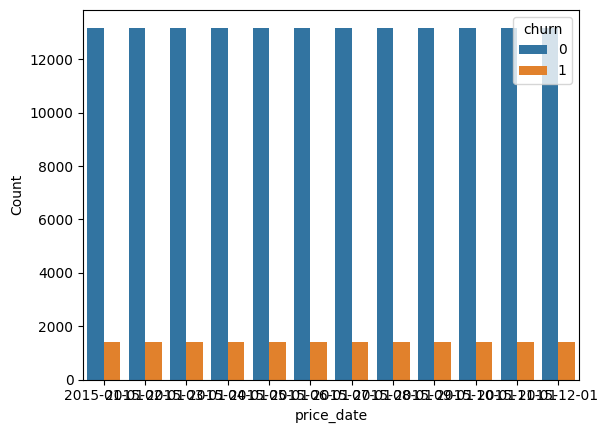

observed data:
 churn           0     1
price_date             
2015-01-01  13169  1417
2015-02-01  13178  1418
2015-03-01  13175  1416
2015-04-01  13175  1417
2015-05-01  13176  1414
2015-06-01  13179  1417
2015-07-01  13183  1418
2015-08-01  13185  1419
2015-09-01  13179  1414
2015-10-01  13181  1416
2015-11-01  13181  1418
2015-12-01  13185  1419
expected data:
 [[13170.02983745  1415.97016255]
 [13179.059064    1416.940936  ]
 [13174.54445072  1416.45554928]
 [13175.44737338  1416.55262662]
 [13173.64152807  1416.35847193]
 [13179.059064    1416.940936  ]
 [13183.57367727  1417.42632273]
 [13186.28244523  1417.71755477]
 [13176.35029603  1416.64970397]
 [13179.96198665  1417.03801335]
 [13181.76783196  1417.23216804]
 [13186.28244523  1417.71755477]]
chi-squared value: 0.0160 for 11 dof; p-value = 1.0000



In [ ]:
#for every category column, doing the Chi-sq test
for cat_var in cat_cols:
  get_chi_sq(cat_var, 'churn', final_df1)      #pricedate remove

In [ ]:
final_df1.drop("price_date", axis =1, inplace = True)

In [ ]:
final_df1.shape

(175149, 26)

In [ ]:
final_df1.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_off_peak_fix',
       'price_peak_fix'],
      dtype='object')

In [ ]:
final_df1.shape

(175149, 26)

In [ ]:
a = ['channel_sales','origin_up']

In [ ]:
l = LabelEncoder()
for i in a:
    final_df1[i]=l.fit_transform(final_df1[i])
final_df1

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,2,678.99,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,2,678.99,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,2,678.99,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,2,678.99,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,2,678.99,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,1,96.34,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,1,96.34,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,1,96.34,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,1,96.34,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000


In [ ]:
final_df1['origin_up'].unique()

array([4, 2, 3, 0, 5, 1])

In [ ]:
dummies = pd.get_dummies(final_df1.has_gas, prefix = 'hg')
dummies

,hg_f,hg_t
0,0,1
0,0,1
0,0,1
0,0,1
0,0,1
...,...,...
14605,1,0
14605,1,0
14605,1,0
14605,1,0


In [ ]:
con_cat = pd.concat([final_df1, dummies], axis =1)
con_cat

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0


In [ ]:
final = con_cat.drop(columns=["has_gas"])
final

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,563dde550fd624d7352f3de77c0cdfcd,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0


In [ ]:
h_g = ['hg_f','hg_t']

In [ ]:
from scipy.stats import chi2_contingency

def get_chi_sq(row, column, final):

    #plotting the graph for each independent variable with target variable
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.countplot(data=final, x=row, hue=column)
    plt.xlabel(row)
    plt.ylabel('Count')
    plt.show()
    #doing this to keep from opening too many figs at once
    plt.close(fig);

    #creating cross tab to calculate chi square values
    xtab = pd.crosstab(final[row], final[column], margins = False)
    print('observed data:\n', xtab)

    #Chi-square contingency table
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))

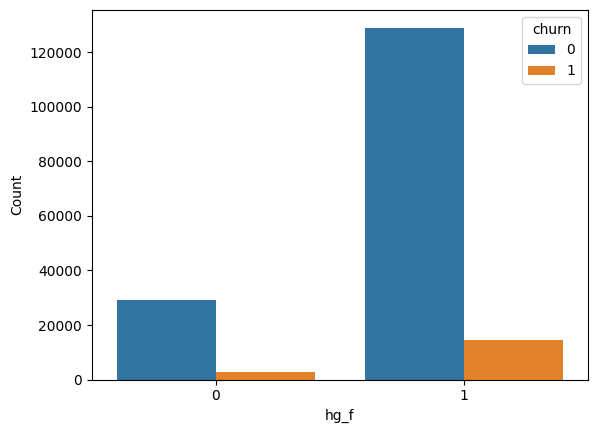

observed data:
 churn       0      1
hg_f                
0       29181   2604
1      128965  14399
expected data:
 [[ 28699.39657092   3085.60342908]
 [129446.60342908  13917.39657092]]
chi-squared value: 101.7082 for 1 dof; p-value = 0.0000



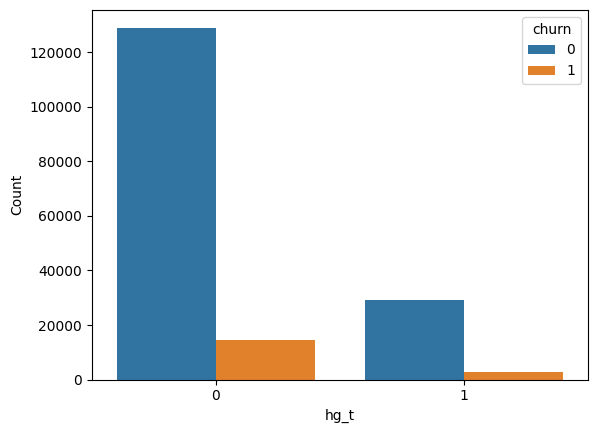

observed data:
 churn       0      1
hg_t                
0      128965  14399
1       29181   2604
expected data:
 [[129446.60342908  13917.39657092]
 [ 28699.39657092   3085.60342908]]
chi-squared value: 101.7082 for 1 dof; p-value = 0.0000



In [ ]:
#for every category column, doing the Chi-sq test
for var1 in h_g:
  get_chi_sq(var1, 'churn', final)

In [ ]:
final.drop('id', inplace = True, axis = 1)

In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t
0,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,4,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,12/18/2009,12/17/2016,12/18/2009,12/21/2015,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0


In [ ]:
final['date_activ'] = pd.to_datetime(final.date_activ)
final['date_activ']

0       2013-06-15
0       2013-06-15
0       2013-06-15
0       2013-06-15
0       2013-06-15
           ...    
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
Name: date_activ, Length: 175149, dtype: datetime64[ns]

In [ ]:
final['date_end'] = pd.to_datetime(final.date_end)
final['date_end']

0       2016-06-15
0       2016-06-15
0       2016-06-15
0       2016-06-15
0       2016-06-15
           ...    
14605   2016-12-17
14605   2016-12-17
14605   2016-12-17
14605   2016-12-17
14605   2016-12-17
Name: date_end, Length: 175149, dtype: datetime64[ns]

In [ ]:
final['date_modif_prod'] = pd.to_datetime(final.date_modif_prod)
final['date_modif_prod']

0       2015-11-01
0       2015-11-01
0       2015-11-01
0       2015-11-01
0       2015-11-01
           ...    
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
14605   2009-12-18
Name: date_modif_prod, Length: 175149, dtype: datetime64[ns]

In [ ]:
final['date_renewal'] = pd.to_datetime(final.date_renewal)
final['date_renewal']

0       2015-06-23
0       2015-06-23
0       2015-06-23
0       2015-06-23
0       2015-06-23
           ...    
14605   2015-12-21
14605   2015-12-21
14605   2015-12-21
14605   2015-12-21
14605   2015-12-21
Name: date_renewal, Length: 175149, dtype: datetime64[ns]

In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,3,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,6,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   channel_sales             175149 non-null  int64         
 1   cons_12m                  175149 non-null  int64         
 2   cons_gas_12m              175149 non-null  int64         
 3   cons_last_month           175149 non-null  int64         
 4   date_activ                175149 non-null  datetime64[ns]
 5   date_end                  175149 non-null  datetime64[ns]
 6   date_modif_prod           175149 non-null  datetime64[ns]
 7   date_renewal              175149 non-null  datetime64[ns]
 8   forecast_cons_year        175149 non-null  int64         
 9   forecast_discount_energy  175149 non-null  int64         
 10  forecast_meter_rent_12m   175149 non-null  float64       
 11  imp_cons                  175149 non-null  float64       
 12  mar

In [ ]:
#final['Diff_activ_end'] = final.apply(lambda row: (row['date_end'] - row['date_activ']).days, axis=1)
#final['Diff_activ_end']= final['Diff_activ_end'].astype(int)

In [ ]:
final['diff_activ_years'] = (final['date_end'] - final['date_activ']) / np.timedelta64(1, 'Y')
final['diff_activ_years']= final['diff_activ_years'].astype(int)

In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,...,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,4,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,4,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,3,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6


In [ ]:
final['diff_activ_years'].unique()

array([ 3,  7,  6,  5,  4,  2, 11, 12,  9, 10,  8, 13])

In [ ]:
final['diff_renewal_years'] = (final['date_end'] - final['date_renewal']) / np.timedelta64(1, 'Y')
final['diff_renewal_years']= final['diff_renewal_years'].astype(int)

In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,...,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years,diff_renewal_years
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0,0,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,0,0,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0


In [ ]:
final['diff_renewal_years'].unique()

array([0, 1, 2, 3])

In [ ]:
#final[['month_activ', 'year_activ','day_activ']] = final['date_activ'].str.split('-', 1, expand=True)
#final

In [ ]:
#final['day_activ'] = final['date_activ'].dt.day
#final['month_activ'] = final['date_activ'].dt.month
#final['year_activ'] = final['date_activ'].dt.year
#final

In [ ]:
#final['day_end'] = final['date_end'].dt.day
#final['month_end'] = final['date_end'].dt.month
#final['year_end'] = final['date_end'].dt.year
#final

In [ ]:
#final['day_modif_prod'] = final['date_modif_prod'].dt.day
#final['month_modif_prod'] = final['date_modif_prod'].dt.month
#final['year_modif_prod'] = final['date_modif_prod'].dt.year
#final

In [ ]:
#final['day_renewal'] = final['date_renewal'].dt.day
#final['month_renewal'] = final['date_renewal'].dt.month
#final['year_renewal'] = final['date_renewal'].dt.year
#final

In [ ]:
final.drop(columns=['date_activ',	'date_end',	'date_renewal'], inplace = True, axis = 1)


In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_modif_prod,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,...,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years,diff_renewal_years
0,4,0,54946,0,2015-11-01,0,0,1.78,0.0,25.44,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,2015-11-01,0,0,1.78,0.0,25.44,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,2015-11-01,0,0,1.78,0.0,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,2015-11-01,0,0,1.78,0.0,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,2015-11-01,0,0,1.78,0.0,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,2009-12-18,0,0,1.07,0.0,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,0,0,1.07,0.0,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,0,0,1.07,0.0,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,2009-12-18,0,0,1.07,0.0,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 14605
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   channel_sales             175149 non-null  int64         
 1   cons_12m                  175149 non-null  int64         
 2   cons_gas_12m              175149 non-null  int64         
 3   cons_last_month           175149 non-null  int64         
 4   date_modif_prod           175149 non-null  datetime64[ns]
 5   forecast_cons_year        175149 non-null  int64         
 6   forecast_discount_energy  175149 non-null  int64         
 7   forecast_meter_rent_12m   175149 non-null  float64       
 8   imp_cons                  175149 non-null  float64       
 9   margin_gross_pow_ele      175149 non-null  float64       
 10  margin_net_pow_ele        175149 non-null  float64       
 11  nb_prod_act               175149 non-null  int64         
 12  net

In [ ]:
#sns.scatterplot(data=final, x="date_modif_prod ", y="churn")
#plt.show()

In [ ]:
final.drop("date_modif_prod", inplace = True, axis = 1)

In [ ]:
final

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,pow_max,churn,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years,diff_renewal_years
0,4,0,54946,0,0,0,1.78,0.0,25.44,25.44,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,0,0,1.78,0.0,25.44,25.44,...,43.648,1,0.125976,0.103395,40.565969,24.339581,0,1,3,0
0,4,0,54946,0,0,0,1.78,0.0,25.44,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,0,0,1.78,0.0,25.44,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
0,4,0,54946,0,0,0,1.78,0.0,25.44,25.44,...,43.648,1,0.125976,0.103395,40.565973,24.339578,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,0,8730,0,0,0,0,1.07,0.0,11.84,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,0,0,1.07,0.0,11.84,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,0,0,1.07,0.0,11.84,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0
14605,0,8730,0,0,0,0,1.07,0.0,11.84,11.84,...,10.392,0,0.165962,0.086905,44.266930,0.000000,1,0,6,0


In [ ]:
X = final.drop('churn', axis = 1)
y = final['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
X_train

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,origin_up,pow_max,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years,diff_renewal_years
1412,0,5483,0,0,0,0,6.53,0.00,20.34,20.34,...,2,11.000,0.152062,0.000000,44.444710,0.00000,1,0,6,0
11937,4,81507,0,19401,0,0,119.31,0.00,58.98,58.98,...,4,26.000,0.123388,0.105155,40.728885,24.43733,1,0,4,0
293,0,10950,0,0,0,30,0.00,0.00,35.11,35.11,...,4,15.000,0.146033,0.085483,44.266930,0.00000,1,0,4,1
14458,7,1083,0,14,14,0,21.19,2.00,11.06,11.06,...,4,11.400,0.149555,0.000000,44.266931,0.00000,1,0,4,0
10972,4,2677,0,0,0,30,9.74,0.00,34.60,34.60,...,4,11.000,0.235160,0.117601,45.760930,0.00000,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,8390,0,782,782,0,146.56,78.28,49.44,49.44,...,4,19.800,0.128067,0.105842,40.728885,24.43733,1,0,5,0
8646,4,5851,0,0,0,0,0.00,0.00,21.52,21.52,...,3,13.200,0.150787,0.000000,44.266930,0.00000,1,0,3,0
11001,7,1548,0,0,0,0,18.51,0.00,20.97,20.97,...,2,10.350,0.146033,0.085483,44.266930,0.00000,1,0,5,0
12247,4,18721,0,0,0,0,3.08,0.00,16.66,16.66,...,4,13.200,0.146734,0.000000,44.266931,0.00000,1,0,7,0


In [ ]:
X_test

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,origin_up,pow_max,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,hg_f,hg_t,diff_activ_years,diff_renewal_years
5284,5,56734,0,10916,10916,0,133.27,1044.73,5.00,5.00,...,3,30.000,0.127566,0.105428,40.565969,24.339581,1,0,11,0
5632,0,22117,0,2044,2044,0,132.17,196.24,19.00,19.00,...,3,20.785,0.125976,0.103395,40.565973,24.339578,1,0,11,0
6156,2,17516,24843,1149,0,0,21.98,0.00,24.42,24.42,...,4,13.200,0.151367,0.000000,44.266931,0.000000,0,1,4,0
6511,4,17131,0,1401,0,0,0.00,0.00,24.42,24.42,...,4,13.200,0.150837,0.000000,44.444710,0.000000,1,0,4,0
2994,0,10119,0,412,0,0,18.31,0.00,33.12,33.12,...,2,13.200,0.153048,0.000000,44.444710,0.000000,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,0,20912,5276,5413,5413,0,26.18,501.62,12.48,12.48,...,2,14.490,0.169629,0.085658,44.266931,0.000000,0,1,7,0
4038,5,1743,0,0,0,0,16.47,0.00,26.02,26.02,...,2,13.200,0.151635,0.000000,44.266930,0.000000,1,0,7,0
5566,4,4926,0,0,0,0,18.37,0.00,18.48,18.48,...,4,13.150,0.146788,0.000000,44.444710,0.000000,1,0,4,0
11898,0,2741,0,614,614,0,16.42,91.04,31.64,31.64,...,2,13.856,0.153133,0.000000,44.266931,0.000000,1,0,6,0


In [ ]:
sc = StandardScaler()
X_Train = sc.fit_transform(X_train)
X_Test = sc.transform(X_test)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid, cv=5,scoring = 'accuracy')

In [ ]:
clf.fit(X_Train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
print('Best Parameters:',clf.best_params_,end='\n\n')
print('Best Score:',clf.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2'}

Best Score: 0.9016764342947404


In [ ]:
clf.fit(X_Test, y_test)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
print('Best Parameters:',clf.best_params_,end='\n\n')
print('Best Score:',clf.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}

Best Score: 0.9043962318013131


In [ ]:
lr = LogisticRegression(C= 100)
lr.fit(X_Train, y_train)

LogisticRegression(C=100)

In [ ]:
lr_acc = accuracy_score(y_train, lr.predict(X_Train))
print(f"Accuracy Score is {lr_acc}")

Accuracy Score is 0.901712116129861


In [ ]:
lr_acc = accuracy_score(y_test, lr.predict(X_Test))
print(f"Accuracy Score is {lr_acc}")

Accuracy Score is 0.9040536682843278


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_Train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [ ]:
GS.fit(X_Train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=43), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=True)

In [ ]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 8}

Best Score: 0.9449825178267732


In [ ]:
GS.fit(X_Test, y_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=43), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=True)

In [ ]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 8}

Best Score: 0.9449825178267732


In [ ]:
dtc_acc = accuracy_score(y_train, dtc.predict(X_Train))
print(f"Accuracy Score is {dtc_acc}")

Accuracy Score is 1.0


In [ ]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_Test))
print(f"Accuracy Score is {dtc_acc}")

Accuracy Score is 0.9997430773622609


In [ ]:
dtc_ps = precision_score(y_test, dtc.predict(X_Test))
print(f"precision_score is {dtc_ps}")                       #from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_score is 0.9993975903614458


In [ ]:
dtc_recall = recall_score(y_test, dtc.predict(X_Test))
print(f"recall Score is {dtc_recall}")

recall Score is 0.9978947368421053


In [ ]:
dtc_f1s = f1_score(y_test, dtc.predict(X_Test))
print(f"F1 Score is {dtc_f1s}")

F1 Score is 0.9986455981941309


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_Train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 15],
    'min_samples_split': [8, 10, 20],
    'n_estimators': [1000]
}
# Create a based model
rf1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

In [ ]:
grid_search.fit(X_Train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 15],
                         'min_samples_split': [8, 10, 20],
                         'n_estimators': [1000]},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

Best Score: 0.9982015305848284


In [ ]:
grid_search.fit(X_Test, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 15],
                         'min_samples_split': [8, 10, 20],
                         'n_estimators': [1000]},
             scoring='accuracy', verbose=2)

In [ ]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

Best Score: 0.9355695118469883


In [ ]:
rf_acc = accuracy_score(y_train, rf.predict(X_Train))
print(f"Accuracy Score is {rf_acc}")

Accuracy Score is 1.0


In [ ]:
rf_acc = accuracy_score(y_test, rf.predict(X_Test))
print(f"Accuracy Score is {rf_acc}")

Accuracy Score is 0.9999429060805024


In [ ]:
rf_recall = recall_score(y_test, rf.predict(X_Test))
print(f"Recall Score is {rf_recall}")

Recall Score is 1.0


In [ ]:
rf_f1s = f1_score(y_test, rf.predict(X_Test))
print(f"Recall Score is {rf_f1s}")

Recall Score is 1.0


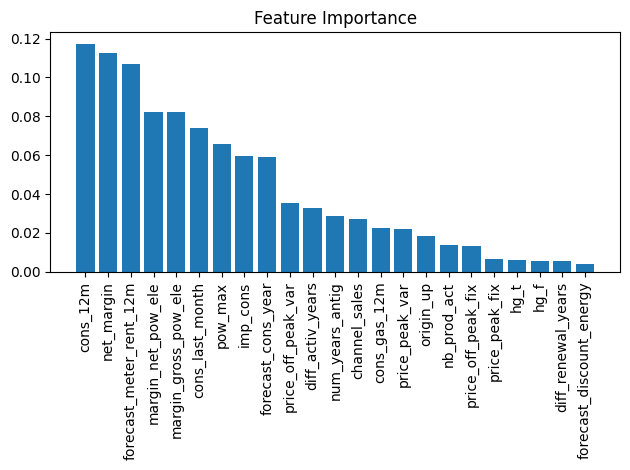

In [ ]:
importances = rf.feature_importances_
plt.title('Feature Importance')
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_Train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_acc = accuracy_score(y_test, gb.predict(X_Test))
print(f"Accuracy Score is {gb_acc}")

Accuracy Score is 0.9065658007422209


In [ ]:
gb_acc = accuracy_score(y_train, gb.predict(X_Train))
print(f"Accuracy Score is {gb_acc}")

Accuracy Score is 0.9042599504706713


In [ ]:
#Xgb = XGBClassifier(n_estimators=1000,max_depth=6,
             # min_child_weight=1, num_parallel_tree=None,
             # random_state= 27,learning_rate =0.1,gamma=0.5, colsample_bytree=0.8,cv = 5, scoring = 'accuracy')
#Xgb.fit(X_Train, y_train)

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
print('Performing hyperparameter tuning using GridSearchCV...')
params = {'max_depth': [3, 5, 7],
          'learning_rate': [0.1, 0.01, 0.001],
          'subsample': [0.7, 0.8, 0.9],
          'colsample_bytree': [0.7, 0.8, 0.9]}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_Train, y_train)

Performing hyperparameter tuning using GridSearchCV...


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}

Best Score: 0.9270405852849006


In [ ]:
grid_search.fit(X_Test, y_test)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9}

Best Score: 0.9249785897801883


In [ ]:
Xgb = XGBClassifier()#n_estimators = 100)
Xgb.fit(X_Train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
Xgb_acc = accuracy_score(y_test, Xgb.predict(X_Test))
print(f"Accuracy Score is {Xgb_acc}")

Accuracy Score is 0.9599486154724521


In [ ]:
Xgb_acc = accuracy_score(y_train, Xgb.predict(X_Train))
print(f"Accuracy Score is {Xgb_acc}")

Accuracy Score is 0.9632383902254512


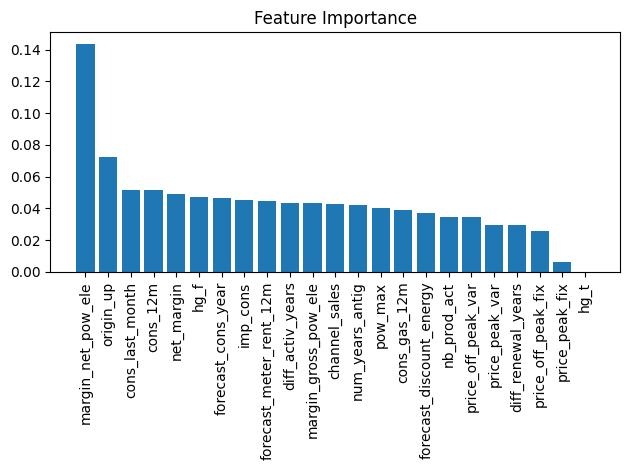

In [ ]:
importances = Xgb.feature_importances_
plt.title('Feature Importance')
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
svc=SVC()
svc.fit(X_Train, y_train)

SVC()

In [ ]:
svc_acc = accuracy_score(y_test, svc.predict(X_Test))
print(f"Accuracy Score is {svc_acc}")

Accuracy Score is 0.9110762203825292


In [ ]:
svc_acc = accuracy_score(y_train, svc.predict(X_Train))
print(f"Accuracy Score is {svc_acc}")

Accuracy Score is 0.9088417702096075


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring = 'accuracy')

# fitting the model for grid search
grid.fit(X_Train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=20.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=20.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=20.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=18.2min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=18.0min
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 6.7min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 7.4min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 6.8min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 7.3min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.902 total time= 6.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=10.0min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)

In [ ]:
grid.fit(X_Test, y_test)

In [ ]:
print('Best Parameters:',grid.best_params_,end='\n\n')
print('Best Score:',grid.best_score_)